In [1]:
import sys
sys.path.append('./../../designer/script')
sys.path.append('./../../')
sys.path.append('./../')
sys.path.append('./')

from analyze_utils.structure import plot_layer_thickness

from film import TwoMaterialFilm, FreeFormFilm, EqOTFilm
from spectrum import BaseSpectrum

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
import pickle

1000.0


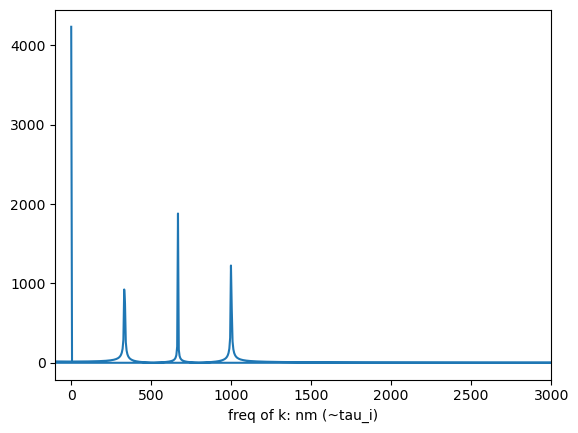

In [6]:
wls = np.linspace(1 / 10, 1 / 3000, 10000)
wls = 1 / wls

film = EqOTFilm(np.array([2, 3, 2, ]), 1000, '1')
film.add_spec_param(0., wls)


R = film.get_spec().get_R()
T = film.get_spec().get_T()
Q = R / T

# fig, ax = plt.subplots(1, 1)
# ax.plot(wls, Q)
# # rescale s.t. k is linear
# f = lambda x: (wls[-1] / wls[0] - wls[0] / wls[-1] + wls[0] / x - wls[-1] / x) / (1 / wls[0] - 1 / wls[-1])
# reciprocal_scaler = matplotlib.scale.FuncScale(ax, (f, f))
# ax.set_xscale(reciprocal_scaler)
# ax.set_xlim(200, 800)

fig, ax = plt.subplots(1, 1)
ax.plot(np.fft.fftfreq(wls.shape[0], 2 * (1 / wls[0] - 1 / wls[-1]) / wls.shape[0]), np.abs(np.fft.fft(Q)))
ax.set_xlim(-100, 3000)
ax.set_xlabel('freq of k: nm (~tau_i)')
# ax.set_ylim(0, 1000)

print(film.get_optical_thickness(1))